In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('Aggregated_Cleaned_Merged_Dataset_No_FIPS.csv')
df.drop(["State.Minimum.Wage", "Federal.Minimum.Wage","Effective.Minimum.Wage"],axis=1,inplace=True)
df.head()

,Year,State,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Total Employment in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1976,Alabama,0.00,10.0,10.00,56.9,2.632667e+06,1.500260e+06,1.399782e+06,100477.583333,6.700000
1,1976,Alaska,12.73,10.0,12.73,56.9,2.399167e+05,1.642791e+05,1.518328e+05,12446.250000,7.566667
2,1976,Arizona,0.00,10.0,10.00,56.9,1.650917e+06,9.819918e+05,8.861592e+05,95832.583333,9.758333
3,1976,Arkansas,8.64,10.0,10.00,56.9,1.546583e+06,8.937798e+05,8.321712e+05,61608.666667,6.916667
4,1976,California,9.09,10.0,10.00,56.9,1.582375e+07,9.898940e+06,8.993283e+06,905657.250000,9.150000


# Simple linear regression

In [101]:
from sklearn.model_selection import train_test_split

X = df[["Year", "State.Minimum.Wage.2020.Dollars", "Federal.Minimum.Wage.2020.Dollars"]]

y = df["Percent (%) of Labor Force Unemployed in State/Area"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.columns

Index(['Year', 'State.Minimum.Wage.2020.Dollars',
       'Federal.Minimum.Wage.2020.Dollars'],
      dtype='object')

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regre = LinearRegression()
regre.fit(X,y)

# Make predictions
y_pred_train = regre.predict(X_train)
y_pred_test = regre.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training MSE: 3.8904250640675873
Test MSE: 3.6851905884423464


In [103]:
pd.DataFrame({"Feature": X.columns, "Coefficient": regre.coef_})

,Feature,Coefficient
0,Year,-0.007290
1,State.Minimum.Wage.2020.Dollars,-0.041213
2,Federal.Minimum.Wage.2020.Dollars,0.734239


# Lasso

In [104]:
from sklearn.preprocessing import StandardScaler

X = df[["Year", "State.Minimum.Wage.2020.Dollars", "Federal.Minimum.Wage.2020.Dollars", "CPI.Average","State",
        "Total Civilian Non-Institutional Population in State/Area", "Total Civilian Labor Force in State/Area"]]
X = pd.get_dummies(X, columns=["State"], drop_first=True).astype(float)

y = df["Percent (%) of Labor Force Unemployed in State/Area"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.columns

Index(['Year', 'State.Minimum.Wage.2020.Dollars',
       'Federal.Minimum.Wage.2020.Dollars', 'CPI.Average',
       'Total Civilian Non-Institutional Population in State/Area',
       'Total Civilian Labor Force in State/Area', 'State_Alaska',
       'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado',
       'State_Connecticut', 'State_Delaware', 'State_District of Columbia',
       'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho',
       'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
       'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_New Hampshire',
       'State_New Jersey', 'State_New Mexico', 'State_New York',
       'State_North Carolina', 'State_North Dakota', 'State_Ohio',
       'State_Oklahoma', 'State_Oregon', 'State_Penns

In [105]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=0.05)
lasso.fit(X_train,y_train)

# Make predictions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training MSE: 3.1442016821772127
Test MSE: 3.169459855410415


/Users/chuck/miniforge3/envs/CS526/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.050e+03, tolerance: 8.099e-01
  model = cd_fast.enet_coordinate_descent(


In [106]:
pd.DataFrame({"Feature": X.columns, "Coefficient": lasso.coef_})[:6]

,Feature,Coefficient
0,Year,-0.809443
1,State.Minimum.Wage.2020.Dollars,0.000000
2,Federal.Minimum.Wage.2020.Dollars,0.801895
3,CPI.Average,0.176605
4,Total Civilian Non-Institutional Population in...,0.000002
5,Total Civilian Labor Force in State/Area,-0.000002


# GAM

In [112]:
from pygam import LinearGAM

## model
gam = LinearGAM(n_splines=10).gridsearch(X_train.values, y_train.values)

y_pred_train = gam.predict(X_train)
y_pred_test = gam.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Training MSE: {mse_train}')
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Test MSE: {mse_test}')

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:01 ETA:   0:00:14
 18% (2 of 11) |####                     | Elapsed Time: 0:00:02 ETA:   0:00:13
 27% (3 of 11) |######                   | Elapsed Time: 0:00:04 ETA:   0:00:11
 36% (4 of 11) |#########                | Elapsed Time: 0:00:05 ETA:   0:00:10
 45% (5 of 11) |###########              | Elapsed Time: 0:00:07 ETA:   0:00:08
 54% (6 of 11) |#############            | Elapsed Time: 0:00:08 ETA:   0:00:07
 63% (7 of 11) |###############          | Elapsed Time: 0:00:10 ETA:   0:00:05
 72% (8 of 11) |##################       | Elapsed Time: 0:00:11 ETA:   0:00:04
 81% (9 of 11) |####################     | Elapsed Time: 0:00:13 ETA:   0:00:02
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:14 ETA:   0:00:01
100% (11 of 11) |########################| Elapsed Time: 0:00:16 Time:  0:00:16


Training MSE: 1.0269616476941383
Test MSE: 1.243522111233888


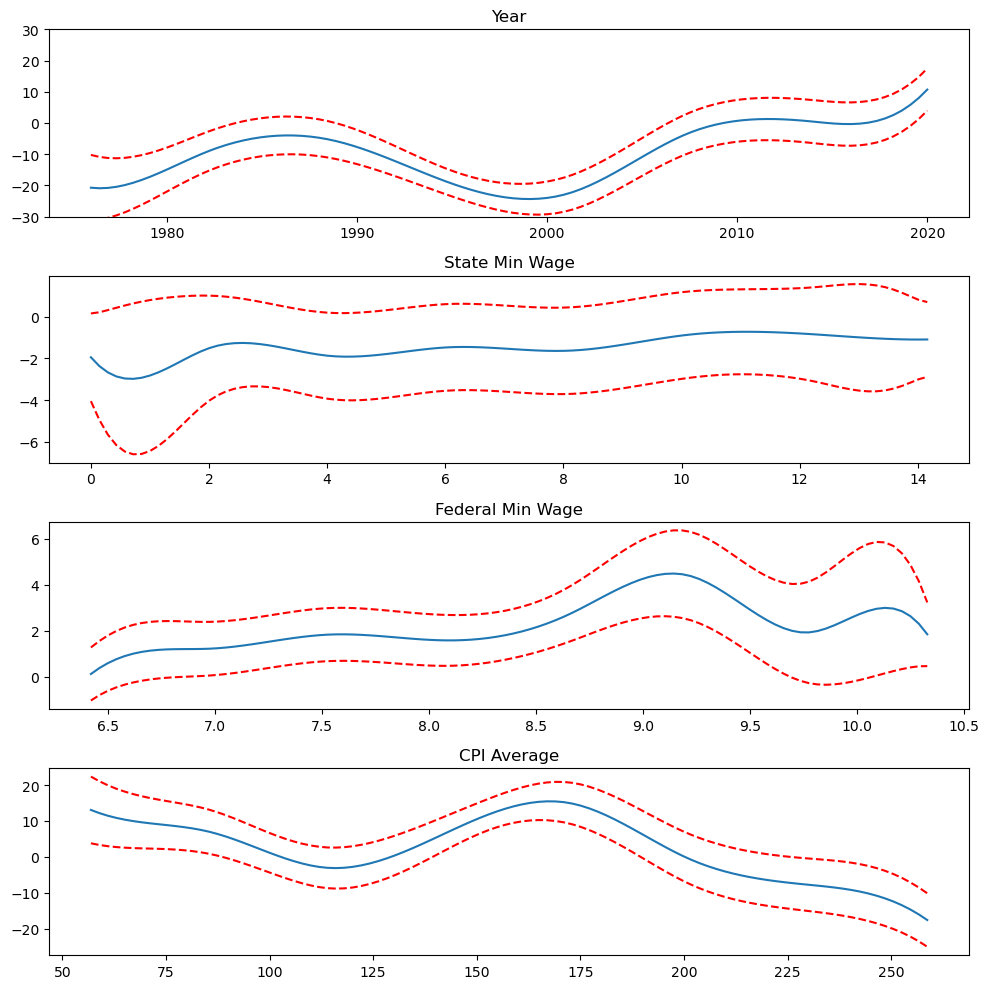

In [129]:
## plotting
fig, axs = plt.subplots(4,1,figsize=(10, 10));

titles = ['Year', 'State Min Wage',
       'Federal Min Wage', 'CPI Average',
       'Total Civilian Non-Institutional',
       'Total Civilian Labor Force']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

plt.tight_layout() 
plt.show()